<a href="https://colab.research.google.com/github/premsai-pendela/Handwritten-Digit-Classification-Using-Convolutional-Neural-Networks-CNN-/blob/main/P_Naga_Prem_Sai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


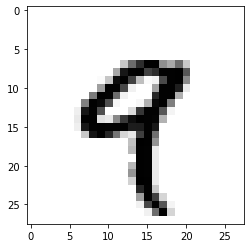

In [ ]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

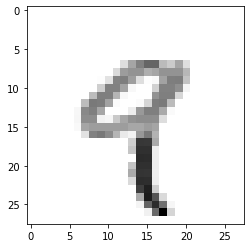

In [ ]:
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [ ]:
print(x_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[4])

9


In [ ]:
x_trainr=np.array(x_train).reshape(-1,28,28,1)
x_testr=np.array(x_test).reshape(-1,28,28,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
#### Creating a neural network
m1=Sequential()

#### First layer
m1.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

#### Second Layer
m1.add(Conv2D(64,(3,3)))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

#### Third Layer
m1.add(Conv2D(64,(3,3)))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(64))
m1.add(Activation("relu"))

m1.add(Dense(32))
m1.add(Activation("relu"))

m1.add(Dense(10))
m1.add(Activation('softmax'))


In [ ]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
m1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])

In [ ]:
h1=m1.fit(x_trainr,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.2660 - acc: 0.9148 - val_loss: 0.0957 - val_acc: 0.9713
Epoch 2/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0871 - acc: 0.9738 - val_loss: 0.0616 - val_acc: 0.9818
Epoch 3/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0620 - acc: 0.9810 - val_loss: 0.0655 - val_acc: 0.9803
Epoch 4/5
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0488 - acc: 0.9853 - val_loss: 0.0512 - val_acc: 0.9855
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0589 - val_acc: 0.9842


In [ ]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
0,0.265955,0.914783,0.095675,0.9713,0
1,0.087094,0.973800,0.061603,0.9818,1
2,0.061985,0.980967,0.065473,0.9803,2
3,0.048754,0.985267,0.051174,0.9855,3
4,0.038851,0.988067,0.058875,0.9842,4


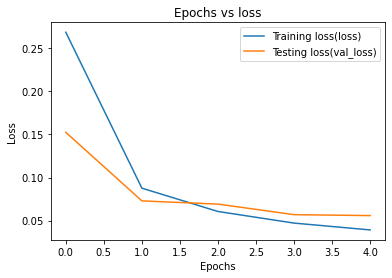

In [ ]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss(loss)')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss(val_loss)')
plt.title('Epochs vs loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

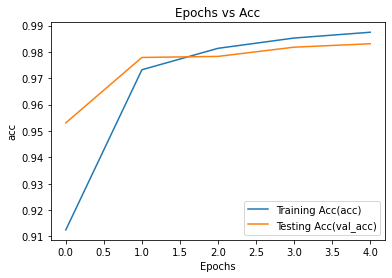

In [ ]:
plt.plot(r1['Epochs'],r1['acc'],label='Training Acc(acc)')
plt.plot(r1['Epochs'],r1['val_acc'],label='Testing Acc(val_acc)')
plt.title('Epochs vs Acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
ypred=m1.predict(x_testr)
print(len(ypred))
print(ypred)

313/313 [==============================] - 2s 6ms/step
10000
[[3.62072790e-08 1.71159656e-04 8.73841273e-05 ... 9.99733746e-01
  1.64007574e-07 3.67203688e-06]
 [1.70444991e-08 1.65520149e-08 9.99999523e-01 ... 3.04232088e-08
  7.07945205e-08 1.15558833e-10]
 [6.56276242e-08 9.99703705e-01 1.45810936e-05 ... 2.85690676e-05
  2.37262662e-04 6.58678061e-07]
 ...
 [2.35055087e-10 1.18078828e-11 9.06770103e-10 ... 1.60414226e-09
  5.34340529e-07 9.38897415e-07]
 [1.18668344e-04 4.66456877e-05 2.21570917e-05 ... 1.23506913e-06
  1.84897240e-02 2.19404799e-04]
 [1.93148958e-06 6.36146646e-09 3.65449955e-06 ... 1.92401216e-12
  2.99158955e-06 4.83969842e-08]]


In [ ]:
ypred1=[np.argmax(i) for i in ypred]
ypred1

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 2,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 8,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 5,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [ ]:
print(y_test)

[7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm=confusion_matrix(y_test,ypred1)
print(cm)


[[ 968    1    1    0    1    0    3    1    0    5]
 [   0 1119    2    3    0    0    1    1    9    0]
 [   3    0 1013    0    0    0    4    7    5    0]
 [   0    0    1 1003    0    3    0    0    2    1]
 [   1    0    1    0  963    0    4    2    3    8]
 [   3    0    1    6    0  871    4    1    5    1]
 [   0    2    1    0    4    0  950    0    1    0]
 [   0    4   11    6    0    1    0  996    8    2]
 [   0    0    4    2    1    1    0    0  964    2]
 [   2    1    0    2    4    2    1    2   11  984]]


In [ ]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

